## Import Required Libraries

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Dataset

In [30]:
!pip install openpyxl


In [31]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel("UCI_Credit_Card.xlsx")


Saving UCI_Credit_Card.xlsx to UCI_Credit_Card (1).xlsx


In [32]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
#checking no. of rows and columns in our dataset
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df['default.payment.next.month'].value_counts(normalize=True)


,proportion
default.payment.next.month,
0,0.7788
1,0.2212


In [9]:
df = df.drop(columns=['ID'], errors='ignore')

Removed the ID column (not useful for prediction)

## Exploratory Data Analysis

/tmp/ipython-input-3270694274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


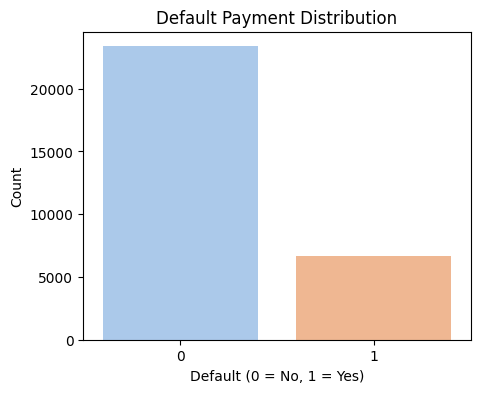

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(
    x='default.payment.next.month',
    data=df,
    palette="pastel"
)
plt.title("Default Payment Distribution")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

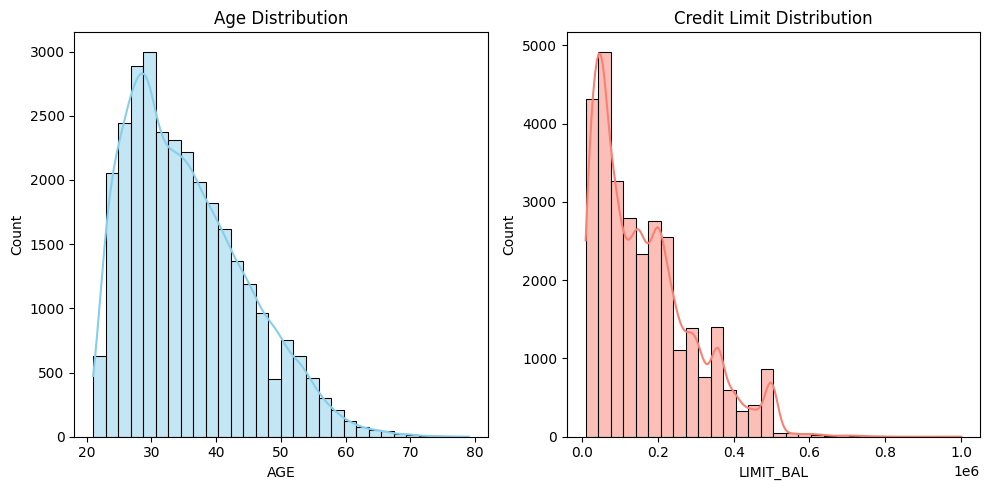

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(df['AGE'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")

plt.subplot(1,2,2)
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color="salmon")
plt.title("Credit Limit Distribution")

plt.tight_layout()
plt.show()

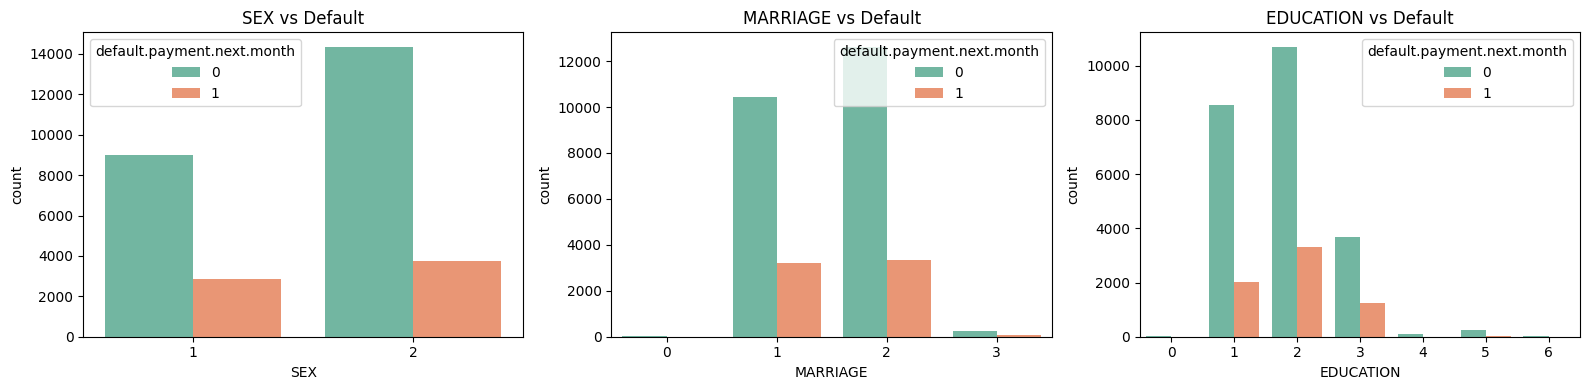

In [12]:
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.countplot(x='SEX', hue='default.payment.next.month', data=df, palette="Set2")
plt.title("SEX vs Default")

plt.subplot(1,3,2)
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df, palette="Set2")
plt.title("MARRIAGE vs Default")

plt.subplot(1,3,3)
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df, palette="Set2")
plt.title("EDUCATION vs Default")

plt.tight_layout()
plt.show()

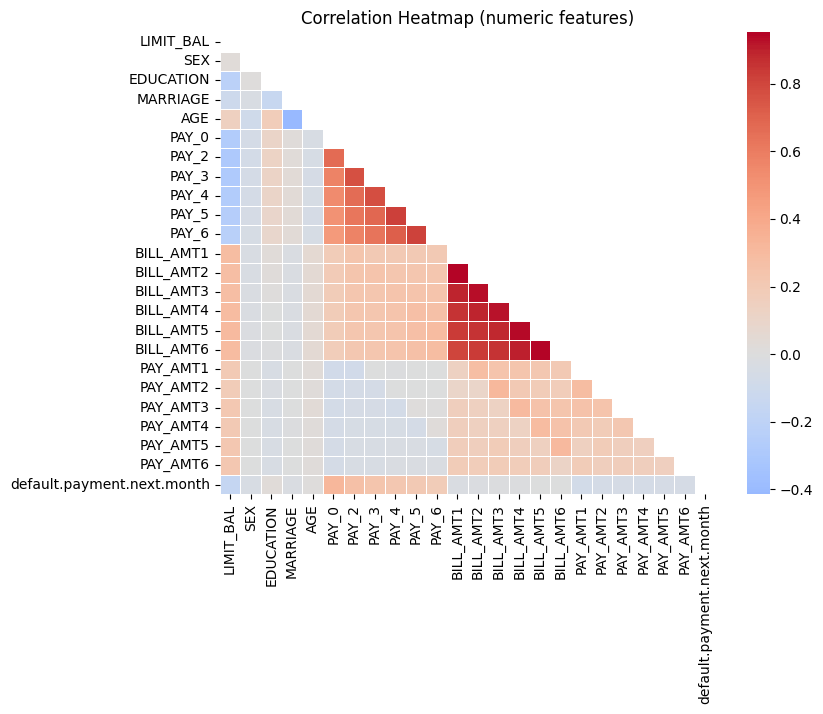

In [13]:
plt.figure(figsize=(8,6))
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlation Heatmap (numeric features)")
plt.show()

/tmp/ipython-input-380913652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")


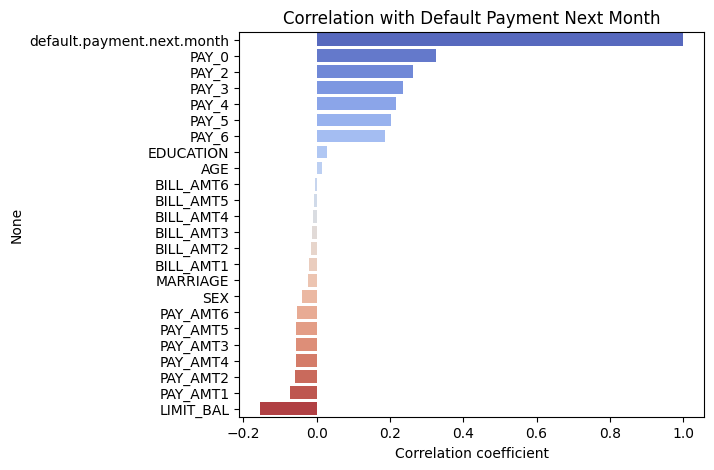

In [14]:
target_corr = corr['default.payment.next.month'].sort_values(ascending=False)

plt.figure(figsize=(6,5))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation with Default Payment Next Month")
plt.xlabel("Correlation coefficient")
plt.show()


Payment history is the strongest predictor. Demographic features alone aren’t enough.

## Split Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Scale Features

In [17]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Create and Train the Model

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

Default cases (1) are much fewer than non-default (0).

That’s why class_weight='balanced' was important; otherwise, the model would predict “No Default” most of the time

## Evaluation (reports & plots)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000

[[3255 1418]
 [ 504  823]]
ROC-AUC: 0.6583753032339091


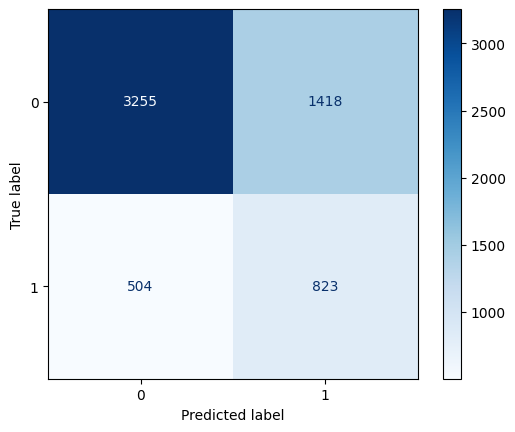

In [22]:
  from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
  plt.show()

<Figure size 600x600 with 0 Axes>

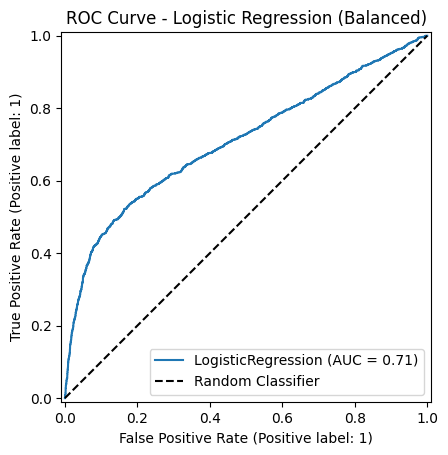

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression (Balanced)")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.legend()
plt.show()

## Conclusion

It demonstrates the complete machine learning workflow: EDA → Preprocessing → Modeling → Evaluation. Logistic Regression (with class balancing) provides a good baseline model for credit risk prediction. With feature engineering and advanced algorithms, this system can evolve into a real-world credit scoring model that helps financial institutions predict future defaults and minimize financial risk.